Questions:
- dataframes not same size
- can't find nan values in dataframes

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [15]:
tech_data = pd.read_csv('tech_data.csv').drop(columns={'Unnamed: 0'})
finance_data = pd.read_csv('../ExtractFinances/Financial_stock_data.csv')
auto_data = pd.read_csv('../Automotive/final_auto_stock_data.csv')

In [17]:
pd.merge(pd.merge(tech_data, finance_data, how='outer'), auto_data, how = 'outer')
a = pd.merge(tech_data, finance_data, on = ['Date', 'Ticker', 'Sector', 'Industry', 'Open', 'High', 'Low', 'Close', 'Volume'])
# b = pd.merge(a, auto_data, on = ['Date', 'Ticker', 'Sector', 'Industry', 'Open', 'High', 'Low', 'Close', 'Volume'])
a

,Date,Ticker,Sector,Industry,Open,High,Low,Close,Volume


In [12]:
data = pd.concat([tech_data, finance_data, auto_data])
print (f'there are {len(data["Ticker"].unique())} unique stocks')

there are 55 unique stocks


,Date,Ticker,Sector,Industry,Open,High,Low,Close,Volume
0,2018-01-02,NVDA,Technology,Semiconductors,195.78,199.5000,194.500,199.35,8303752.0
1,2018-01-03,NVDA,Technology,Semiconductors,204.10,213.7000,203.750,212.47,22499518.0
2,2018-01-04,NVDA,Technology,Semiconductors,215.76,218.0500,212.690,213.59,14346675.0
3,2018-01-05,NVDA,Technology,Semiconductors,214.19,216.9100,211.080,215.40,14008768.0
4,2018-01-08,NVDA,Technology,Semiconductors,220.40,225.0000,218.580,222.00,21190932.0
...,...,...,...,...,...,...,...,...,...
28602,2023-11-28,INTC,Automobiles,Semiconductors,43.69,44.3827,43.660,44.23,24548874.0
28603,2023-11-29,INTC,Automobiles,Semiconductors,44.60,45.3400,44.600,44.94,38982026.0
28604,2023-11-30,INTC,Automobiles,Semiconductors,44.65,45.0900,44.410,44.70,46262971.0
28605,2023-12-01,INTC,Automobiles,Semiconductors,44.36,44.3600,42.860,43.74,43928371.0


In [17]:
# unique stocks
print(tech_data['Ticker'].unique())
print(finance_data['Ticker'].unique())
print(auto_data['Ticker'].unique())
array = np.append((np.append(tech_data['Ticker'].unique(), finance_data['Ticker'].unique())),auto_data['Ticker'].unique())
print((array))

def find_duplicates(lst):
    seen = set()
    duplicates = set()

    for item in lst:
        if item in seen:
            duplicates.add(item)
        else:
            seen.add(item)

    return list(duplicates)

# Example usage with strings:
print("Duplicates in the list:", find_duplicates(array))


['NVDA' 'TSM' 'AVGO' 'AMD' 'INTC' 'CRM' 'SAP' 'INTU' 'NOW' 'ZI' 'AAPL'
 'MSFT' 'SONY' 'LPL' 'SONO' 'ACN' 'IBM' 'FI' 'INFY' 'CTSH']
['WD' 'PFSI' 'LDI' 'GHI' 'COOP' 'AFL' 'HIG' 'PRU' 'ALL' 'PGR' 'MS' 'BLK'
 'GS' 'TROW' 'BEN' 'V' 'MA' 'AXP' 'DFS' 'COF']
['CPRT' 'KMX' 'PAG' 'LAD' 'AN' 'MBLY' 'APTV' 'MGA' 'LKQ' 'ALV' 'TSLA' 'TM'
 'HMC' 'GM' 'F' 'NVDA' 'TSM' 'AVGO' 'AMD' 'INTC']
['NVDA' 'TSM' 'AVGO' 'AMD' 'INTC' 'CRM' 'SAP' 'INTU' 'NOW' 'ZI' 'AAPL'
 'MSFT' 'SONY' 'LPL' 'SONO' 'ACN' 'IBM' 'FI' 'INFY' 'CTSH' 'WD' 'PFSI'
 'LDI' 'GHI' 'COOP' 'AFL' 'HIG' 'PRU' 'ALL' 'PGR' 'MS' 'BLK' 'GS' 'TROW'
 'BEN' 'V' 'MA' 'AXP' 'DFS' 'COF' 'CPRT' 'KMX' 'PAG' 'LAD' 'AN' 'MBLY'
 'APTV' 'MGA' 'LKQ' 'ALV' 'TSLA' 'TM' 'HMC' 'GM' 'F' 'NVDA' 'TSM' 'AVGO'
 'AMD' 'INTC']
Duplicates in the list: ['INTC', 'NVDA', 'AMD', 'TSM', 'AVGO']


#### All companies

In [18]:
print(f'There are {len(data["Ticker"].unique())} stocks')

There are 55 stocks


In [20]:
data_sectors = data['Sector'].unique()
close_prices = []
for sector in data_sectors:
    close_prices.append(data[data['Sector']==sector].groupby('Date')['Close'].sum().rename(sector))

close_prices_sector = pd.concat(close_prices, axis = 1)
# close_prices_sector.dropna(how='any', axis=0)
close_prices_sector

,Technology,Finance,Automobiles
Date,,,
2018-01-02,1916.25,1975.795009,1739.23
2018-01-03,1943.10,1983.375045,1762.93
2018-01-04,1960.99,2002.769992,1772.72
2018-01-05,1980.18,2019.825018,1794.66
2018-01-08,1989.89,2019.839986,1827.63
...,...,...,...
2023-11-30,4724.15,3144.529962,3150.65
2023-12-01,4751.80,3177.559958,3186.01
2023-12-04,4700.84,3175.820027,3157.67


#### Moving Average
4. Which sector has the best moving average in there respective industry? (Alison)
    - Grouped bargraph: price values per sector (xlabel: sectors) --> moving average (1 graph)

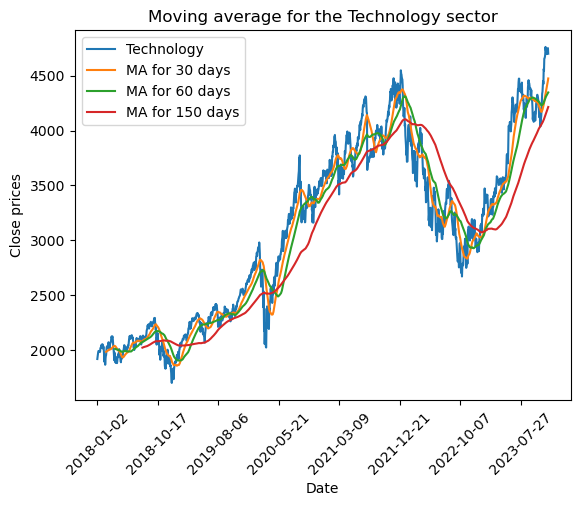

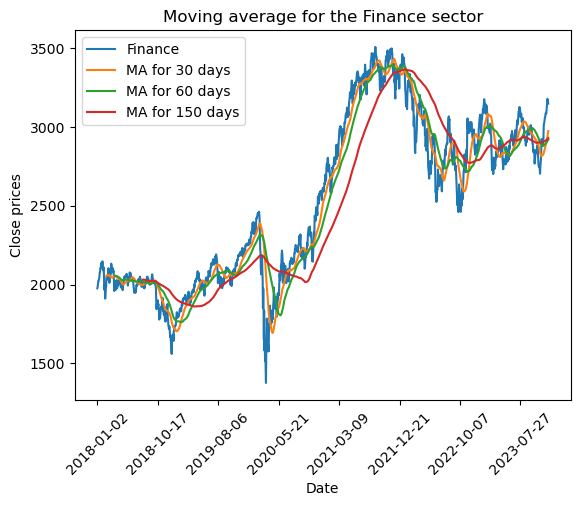

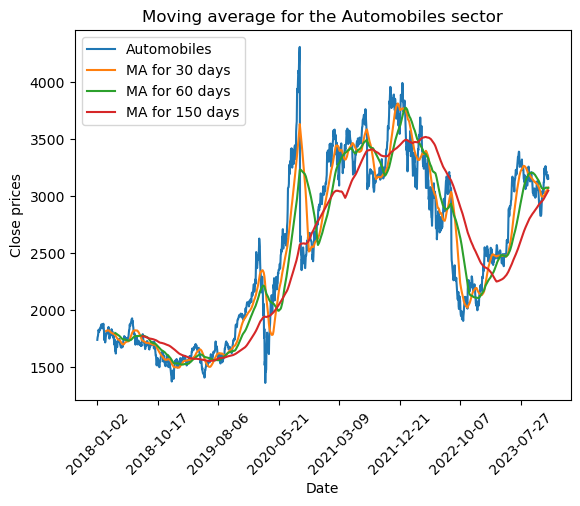

In [8]:
mov_avg_dict = {}
ma_days = [30, 60, 150]
for sector in data_sectors:
    mov_avg = {}
    mov_avg[sector] = close_prices_sector[sector]
    for ma in ma_days:
        column_name = f"MA for {ma} days"
        mov_avg[column_name] = close_prices_sector[sector].rolling(ma).mean()
    mov_avg_df = pd.DataFrame(mov_avg)
    mov_avg_dict[sector] = mov_avg_df
    mov_avg_dict[sector].plot(rot = 45, 
                              ylabel = 'Close prices',
                              title = f'Moving average for the {sector} sector')


# mov_avg_dict['Technology']

Text(0.5, 1.0, 'Automotives')

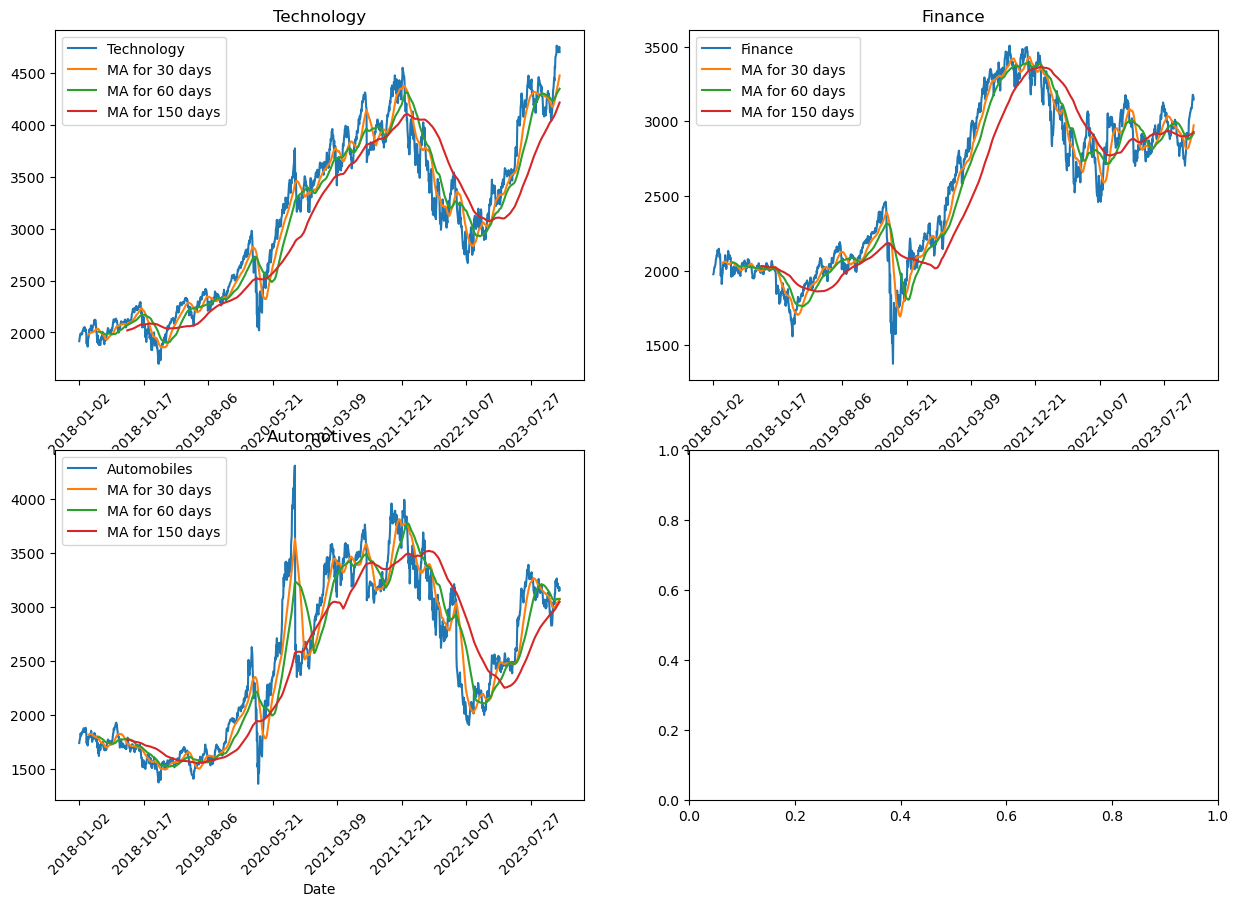

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

mov_avg_dict['Technology'].plot(ax=axes[0,0], rot = 45)
axes[0,0].set_title('Technology')

mov_avg_dict['Finance'].plot(ax=axes[0,1], rot = 45)
axes[0,1].set_title('Finance')

mov_avg_dict['Automobiles'].plot(ax=axes[1, 0], rot = 45)
axes[1, 0].set_title('Automotives')

#### Highest volume traded ticker (By stock  in sector)
5. Which ticker was most traded in each year? (Alison)
    - Answered by bar graph(name of stocks in each sector as xticks and height of the bar will be the average of volume)

##### Tech Volumes by year

In [10]:
years = [2018, 2019, 2020, 2021, 2022, 2023]

,2018,2019,2020,2021,2022,2023
NVDA,3.411411e+09,2.883084e+09,3.040266e+09,5.307430e+09,1.362980e+10,1.117889e+10
TSM,2.018860e+09,1.919252e+09,2.399193e+09,2.397735e+09,3.240069e+09,2.515079e+09
AVGO,1.046907e+09,6.530460e+08,6.176931e+08,4.747444e+08,5.973026e+08,5.773650e+08
AMD,2.115440e+10,1.673609e+10,1.558185e+10,1.291049e+10,2.293928e+10,1.419940e+10
INTC,7.296698e+09,5.537871e+09,7.987810e+09,7.240841e+09,9.797815e+09,9.723886e+09


In 2018, 'AMD' has the maximum value: 21154399914.0
In 2019, 'AMD' has the maximum value: 16736086831.0
In 2020, 'AAPL' has the maximum value: 18552582945.0
In 2021, 'AAPL' has the maximum value: 22798348120.0
In 2022, 'AMD' has the maximum value: 22939283690.0
In 2023, 'AMD' has the maximum value: 14199398667.0


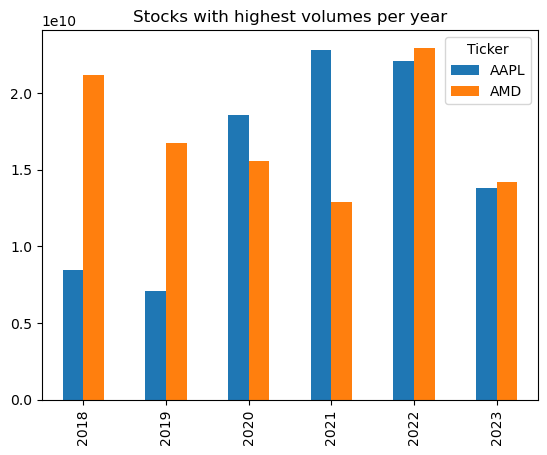

In [11]:
# calculating tech volumes per year
tech_data['Date'] = pd.to_datetime(tech_data['Date'])
tech_stocks = tech_data['Ticker'].unique()
volumes_tech = pd.DataFrame(index = tech_stocks)

for stock in tech_stocks:
    for year in years:
        # print(stock, year)
        temp_df = tech_data[tech_data['Ticker'] == stock]
        volumes_tech.loc[stock, str(year)] = temp_df[temp_df['Date'].dt.year == year]['Volume'].sum()
display(volumes_tech.head())

volumes_tech.index.name = 'Ticker'
volumes_tech.loc[['AAPL', 'AMD']].transpose().plot(kind = 'bar')
plt.title('Stocks with highest volumes per year')
max_idx = volumes_tech.idxmax()
max_values = volumes_tech.max()

# Display the result
for year, (index, value) in zip(volumes_tech.columns, zip(max_idx, max_values)):
    print(f"In {year}, '{index}' has the maximum value: {value}")

finance volumes:


,2018,2019,2020,2021,2022,2023
WD,54260700.0,37565800.0,62259200.0,36759200.0,39475400.0,45762900.0
PFSI,50420600.0,77963000.0,208978900.0,181616400.0,136023100.0,75648100.0
LDI,0.0,0.0,0.0,145805300.0,198008700.0,84856600.0
GHI,8055403.0,11297492.0,19453061.0,15183008.0,10558602.0,8543800.0
COOP,93931032.0,190457000.0,257945600.0,199618500.0,190745900.0,140258400.0


In 2018, 'MS' has the maximum value: 2615913900.0
In 2019, 'MS' has the maximum value: 2610298700.0
In 2020, 'MS' has the maximum value: 3442832100.0
In 2021, 'MS' has the maximum value: 2455031800.0
In 2022, 'MS' has the maximum value: 2212605900.0
In 2023, 'MS' has the maximum value: 1790934200.0


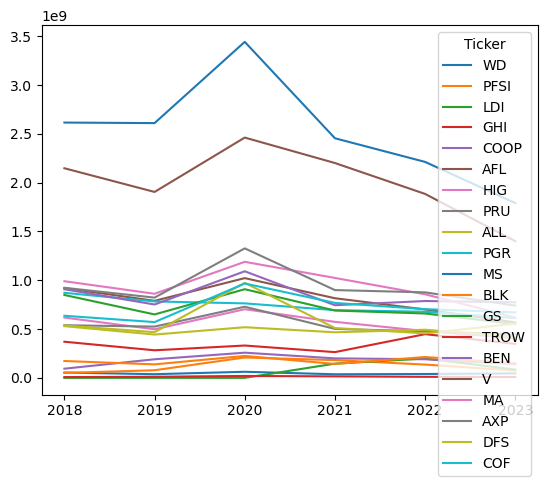

In [12]:
# calculating finance volumes per year
finance_data['Date'] = pd.to_datetime(finance_data['Date'])
finance_stocks = finance_data['Ticker'].unique()
volumes_finance = pd.DataFrame(index = finance_stocks)

for stock in finance_stocks:
    for year in years:
        # print(stock, year)
        temp_df = finance_data[finance_data['Ticker'] == stock]
        volumes_finance.loc[stock, str(year)] = temp_df[temp_df['Date'].dt.year == year]['Volume'].sum()
print(f'finance volumes:')

display(volumes_finance.head())

volumes_finance.index.name = 'Ticker'
volumes_finance.transpose().plot()
max_idx = volumes_finance.idxmax()
max_values = volumes_finance.max()

# Display the result
for year, (index, value) in zip(volumes_finance.columns, zip(max_idx, max_values)):
    print(f"In {year}, '{index}' has the maximum value: {value}")

auto volumes:


,2018,2019,2020,2021,2022,2023
CPRT,511053510.0,361230870.0,432237914.0,248615282.0,334368470.0,619347614.0
KMX,463116782.0,399348221.0,418327154.0,288149404.0,497642399.0,470726931.0
PAG,106815905.0,94667891.0,94524261.0,79177681.0,100993602.0,77298944.0
LAD,81365326.0,60115127.0,85478498.0,92532328.0,94869262.0,64051926.0
AN,216788320.0,182633796.0,221615313.0,237972327.0,219366452.0,149428514.0


In 2018, 'AMD' has the maximum value: 21154399914.0
In 2019, 'AMD' has the maximum value: 16736086831.0
In 2020, 'F' has the maximum value: 19386854291.0
In 2021, 'F' has the maximum value: 19834224649.0
In 2022, 'AMD' has the maximum value: 22939283690.0
In 2023, 'TSLA' has the maximum value: 32270767332.0


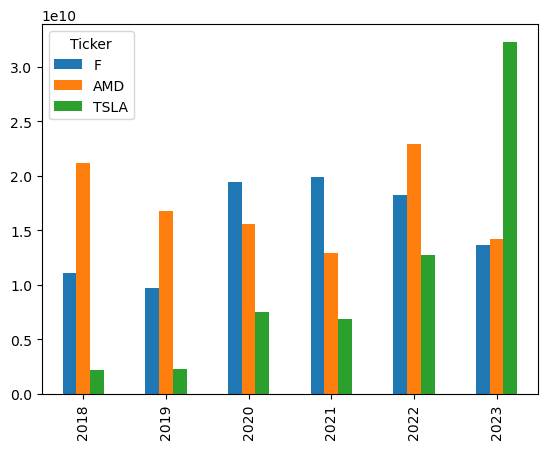

In [13]:
# calculating auto volumes per year
auto_data['Date'] = pd.to_datetime(auto_data['Date'])
auto_stocks = auto_data['Ticker'].unique()
volumes_auto = pd.DataFrame(index = auto_stocks)

for stock in auto_stocks:
    for year in years:
        # print(stock, year)
        temp_df = auto_data[auto_data['Ticker'] == stock]
        volumes_auto.loc[stock, str(year)] = temp_df[temp_df['Date'].dt.year == year]['Volume'].sum()
print(f'auto volumes:')
display(volumes_auto.head())

volumes_auto.index.name = 'Ticker'
volumes_auto.loc[['F', 'AMD', 'TSLA']].transpose().plot(kind = 'bar')
max_idx = volumes_auto.idxmax()
max_values = volumes_auto.max()

# Display the result
for year, (index, value) in zip(volumes_auto.columns, zip(max_idx, max_values)):
    print(f"In {year}, '{index}' has the maximum value: {value}")